# **ML-8. Продвинутые методы машинного обучения**

# 1. Введение

→ В прошлом модуле мы научились важному этапу в разработке модели — поиску оптимальных гиперпараметров. Этот этап важен для получения лучшего качества модели. 

В этом модуле мы поговорим о способах ансамблирования и сбора в пайплайн как о дальнейшем шаге развёртывания модели. Дальнейшим этапом в освоении профессии дата-сайентиста станет погружение в тематику задач и основных методов решения задач **metric learning**.

## АНСАМБЛИРОВАНИЕ МОДЕЛЕЙ

При изучении Data Science идея ансамблирования впервые встречается при упоминании такой модели, как **случайный лес**. В данной модели обучаются базовые модели, представленные решающими деревьями,  предсказания которых впоследствии агрегируются некоторым образом, зависящим от задачи. В случае задачи регрессии берётся среднее либо средневзвешенное. В случае задачи классификации класс присваивается по принципу большинства. 

![](https://lms.skillfactory.ru/assets/courseware/v1/67a412a1866884f5928f98e5781cfec3/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dspr-ml-8-2.png)

Этот знакомый нам подход построения ансамбля называется **бэггингом** и позволяет улучшить качество предсказания. Однако существуют и другие техники ансамблирования, которым и посвятим часть модуля.

## PIPELINE

Как известно, любая задача классического машинного обучения сводится к этапам обработки данных с последующей генерацией признаков. Позднее признаки отбираются и подаются на модель, которую в свою очередь обучают и настраивают, находя оптимальные гиперпараметры. Качество модели проверяют с помощью методов валидации (например, **кросс-валидации**). 

![](https://lms.skillfactory.ru/assets/courseware/v1/69e171db9504de109deb18b06242a056/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst-3-ml-8-1.png)

> Процесс автоматического поэтапного выполнения манипуляций с данными, включающий в себя сбор, обработку, генерацию и отбор признаков, обучение модели с последующей её настройкой и проверкой качества называется **пайплайном**. 

Также  под пайплайном иногда подразумевают автоматизацию одного или нескольких этапов, названных ранее, например обработку данных. 

В этом модуле мы рассмотрим, для чего стоит использовать пайплайны, а также познакомимся с базовыми подходами по созданию пайплайнов на базе библиотеки scikit-learn.

## METRIC LEARNING

Любые подходы в машинном обучении, которые требуют измерения расстояния между объектами в выборке, являются подходами **metric learning**. Основными задачами, решаемыми подходами metric learning, наряду с классическими задачами обучения с учителем, являются задача **кластеризации** и задача **понижения размерности**. Также metric learning иногда используется в задачах восстановления данных по принципу нахождения ближайшего похоже объекта.

В этом модуле мы научимся применять на практике основные методы и подходы metric learning, в частности **kNN, k-means**.

## ЦЕЛИ МОДУЛЯ

Целями модуля являются:

✔️ Научиться самостоятельно ансамблировать различными методами модели для повышения качества предсказаний.

✔️ Освоить практические методы создания пайплайнов и создать свой.

✔️ Применить подходы metric learning на практике.

# 2. Ансамблирование: бэггинг, случайный лес

→ Основным подходом для улучшения качества слабых и нестабильных моделей является обучение моделей для решения одной и той же поставленной задачи с последующим объединением и получением некоторого более сильного и стабильного консенсус-решения.  Как мы знаем, модели, используемые для ансамблирования, называются **базовыми**.

[→ Скачайте ноутбук с кодом](https://lms.skillfactory.ru/assets/courseware/v1/7699e6679ca8749f3e5bc78cc40fb40e/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/ML-8._Ensembles.ipynb)

Существует три основных способа построения ансамблей:

**Бэггинг** — параллельно обучаем множество одинаковых моделей, а для предсказания берём среднее по предсказаниям каждой из моделей.

**Бустинг** — последовательно обучаем множество одинаковых моделей, где каждая новая модель концентрируется на тех примерах, где предыдущая допустила ошибку.

**Стекинг** — параллельно обучаем множество разных моделей, отправляем их результаты в финальную модель, и уже она принимает решение. 

> **Бэггинг (bagging)** — алгоритм построения ансамбля путём параллельного обучения множества независимых друг от друга моделей.

Самым распространённым примером ансамбля типа бэггинг является уже знакомый нам **случайный лес** (Random Forest). 

Вам уже известно, что случайный лес является ансамблем решающих деревьев, в котором выборка выбирается посредством бутстрапа. Далее каждое решающее дерево обучается на случайной подвыборке из признакового пространства. Иными словами, случайный лес содержит в себе две случайности: 

После обучения отдельные решающие деревья объединяются в ансамбль. Ранее мы узнали, что в случайном лесу для задачи **классификации** ансамблирование происходит посредством большинства голосов (Majority Vote). Для задачи **регрессии** же ансамблирование происходит посредством усреднения результата предсказания каждой базовой модели (Averaging).

Давайте рассмотрим это на примере. 

Для задачи регрессии ансамблирование решения 10 случайных деревьев есть не что иное, как среднее значение предсказаний данных моделей. Пускай вектор ответов моделей равен out = [0.5, 0.6, 0.2, 0.4, 0.9, 1.0, -0.5, 0.3, 0.2, 0.0]. 

Посчитаем среднее значение: 

![](https://lms.skillfactory.ru/assets/courseware/v1/108d9322eaadc994332c3f9494b07670/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst-3-ml-8-50.png)

Итак, среднее значение вектора out равно 0.36, что и является предсказанием случайного леса.

![](https://lms.skillfactory.ru/assets/courseware/v1/42662ce6e6df7bda5ff3de6115a67abf/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst-3-ml-8-3.png)

✍️ Давайте проверим на практике, что случайный лес улучшает предсказание случайного дерева. 

Для этого возьмём [датасет по решению задачи на прогрессирование диабета](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset). Мы будем предсказывать уровень прогрессирования болезни относительно базового уровня (некоторая численная мера, насколько «сильно» болен пациент диабетом). Минимальное значение составляет 25, максимальное — 346. Далее посмотрим на распределение, чтобы убедиться, что это не многоклассовая классификация, данные нормированы и закодированы категориальным кодировщиком. 

Качество будем измерять по среднему квадрату ошибки (MSE) на кросс-валидации с точностью до второго знака после запятой. 

Для чистоты эксперимента возьмём решающее дерево с глубиной 10 (DecisionTreeRegressor) и случайный лес из 10 деревьев (параметр n_estimators) с глубиной 10 (RandomForestRegression). Предлагается исполнить код:

In [52]:
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

data = load_diabetes(as_frame=True)
X = data['frame']
y = data['target']
 
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


<AxesSubplot:>

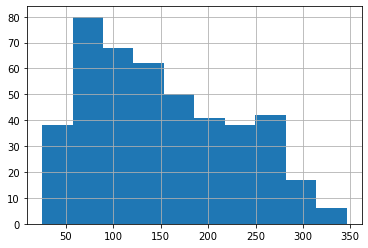

In [53]:
y.hist()


In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
 
print(f'Размерность обучающей выборки {X_train.shape}')
print(f'Размерность тестовой выборки {X_test.shape}')
#Размерность обучающей выборки (296, 11)
#Размерность тестовой выборки (146, 11)
 
regr1 = DecisionTreeRegressor(max_depth=10, random_state=42)
regr1.fit(X_train, y_train)
##DecisionTreeRegressor(max_depth=10, random_state=42)
 
regr2 = RandomForestRegressor(max_depth=10, n_estimators=10, random_state=42)
regr2.fit(X_train, y_train)
##RandomForestRegressor(max_depth=10, n_estimators=10, random_state=42)
 
y_pred1 = regr1.predict(X_test)
y_pred2 = regr2.predict(X_test)
 
print(f'Качество предсказания по MSE для решающего дерева {round(mean_squared_error(y_test, y_pred1),2)}')
print(f'Качество предсказания по MSE для случайного леса  {round(mean_squared_error(y_test, y_pred2),2)}')

#вывод: Качество предсказания по MSE для решающего дерева 4.09
#Качество предсказания по MSE для случайного леса  1.84

Размерность обучающей выборки (296, 11)
Размерность тестовой выборки (146, 11)
Качество предсказания по MSE для решающего дерева 4.06
Качество предсказания по MSE для случайного леса  1.84


⭐️ На примере случайного леса мы убедились, что качество базовой модели улучшают даже простейшие методы ансамблирования моделей, основанные на бутстрапе, такие как усреднение (Averaging) и голосование большинством (Majority Vote).

Давайте разберёмся, почему ансамблирование моделей улучшает качество. Дело в том, что идея ансамблирования основана на уменьшении разброса предсказаний модели.  

Доказано, что дисперсия ансамбля типа бэггинг (variance) в  раз меньше, чем смещение отдельной базовой модели.

**Доказательство**

Выберем из нашей выборки $X$ бутстрапом $K$ раз выборку длиной $N$. Получим выборки $X_{1}, X_{2}, ..., X_{K}$. Обучим базовые модели $a(x)$ на данных подвыборках. Первую модель $a_{1}(x) = a(x,X_{1})$ обучим на первой выборке бутстрапа, вторую $a_{2}(x) = a(x,X_{2})$ — на второй и так далее. Выполнив данную процедуру  раз, мы получим предсказание как усреднение по всем обученным на подвыборках моделях.

![](https://lms.skillfactory.ru/assets/courseware/v1/eeae6ae8e03e184ff94a533a020c1a73/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst-3-ml-8-58.png)

Теперь рассмотрим изменение смещения (bias) и разброса (variance) ансамблирования по отношению к базовым моделям.

> **Смещение** (bias) есть не что иное, как математическое ожидание разности между истинными ответами y и предсказаниями ансамбля: 

![](https://lms.skillfactory.ru/assets/courseware/v1/0010efcbd8914782f96e32442230250f/asset-v1:SkillFactory+DST-3.0
+28FEB2021+type@asset+block/dst-3-ml-8-51.png)
![](https://lms.skillfactory.ru/assets/courseware/v1/c742c46100695e837ba46566856184cb/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst-3-ml-8-52.png)

Вывод: смещение ансамбля равно смещению базовой модели ансамбля!

Разброс (variance, обозначим далее как ) — это дисперсия ответов алгоритма:

![](https://lms.skillfactory.ru/assets/courseware/v1/3d239a00c5d9d71aec09651f109a150f/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst-3-ml-8-53.png)
![](https://lms.skillfactory.ru/assets/courseware/v1/c704097ba958bf98bb20e2aa7bbac971/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst-3-ml-8-54.png)
![](https://lms.skillfactory.ru/assets/courseware/v1/bc1b9ab29110bd4e40c3d2b1f947fbf1/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst-3-ml-8-55.png)

При условии некоррелированности базовых моделей, которая достигается за счёт обучения на бустрапе, последнее слагаемое равно нулю. Итого:

![](https://lms.skillfactory.ru/assets/courseware/v1/1781bfac94b0757870c894169fbe2e0b/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst-3-ml-8-56.png)

Тогда, зная, что модели не коррелированы, получаем:

![](https://lms.skillfactory.ru/assets/courseware/v1/7c8d37f4978d49117ffa159ebaf2c527/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst-3-ml-8-57.png)

**Вывод**: разброс ансамбля уменьшается в  раз по сравнению с разбросом базовой модели!

Эта методика ансамблирования применима не только к одинаковым моделям (например к решающим деревьям), но и к любым другим моделям. Главное — чтобы базовые модели были максимально нескоррелированы. Такую методику часто используют в соревновательном Data Science на различных хакатонах и Kaggle-контестах. 

⭐️ В этом юните мы разобрали и научились применять на практике методы, лежащие в основе ансамблирования в случайном лесу. О более сложных методах поговорим в следующих юнитах.

### Задание 2.6

Одним из самых важных параметров, который непосредственно отвечает за переобучение и недообучение в деревьях, является глубина дерева. Предлагается используя код из модуля попытаться добиться неообучения для решающего дерева и случайного леса. Для этого:

Используя код из модуля, поставьте глубину деревьев в решающем дереве и случайном лесу, равную 2.

В качестве ответа приведите MSE решающего дерева и случайного леса (по модулю), округлённую до второго знака после запятой.

In [55]:
regr3 = DecisionTreeRegressor(max_depth=2, random_state=42)
regr3.fit(X_train, y_train)
 
regr4 = RandomForestRegressor(max_depth=2, n_estimators=10, random_state=42)
regr4.fit(X_train, y_train)
 
y_pred3 = regr3.predict(X_test)
y_pred4 = regr4.predict(X_test)
 
print(f'Качество предсказания по MSE для решающего дерева {round(mean_squared_error(y_test, y_pred3),2)}')
print(f'Качество предсказания по MSE для случайного леса  {round(mean_squared_error(y_test, y_pred4),2)}')

Качество предсказания по MSE для решающего дерева 397.47
Качество предсказания по MSE для случайного леса  303.12


### Задание 2.7

Известно, что при большой глубине деревья склонны к переобучению. В данном задании предлагается, используя код и прошлого задания, попытаться искусственно добиться переобучения модели решающего дерева и случайного леса.

Используя код из модуля, поставьте глубину деревьев в решающем дереве и случайном лесу, равную 1000.

В качестве ответа приведите MSE решающего дерева и случайного леса (по модулю), округлённую до второго знака после запятой.

In [56]:
regr5 = DecisionTreeRegressor(max_depth=1000, random_state=42)
regr5.fit(X_train, y_train)
 
regr6 = RandomForestRegressor(max_depth=1000, n_estimators=10, random_state=42)
regr6.fit(X_train, y_train)
 
y_pred5 = regr5.predict(X_test)
y_pred6 = regr6.predict(X_test)
 
print(f'Качество предсказания по MSE для решающего дерева {round(mean_squared_error(y_test, y_pred5),2)}')
print(f'Качество предсказания по MSE для случайного леса {round(mean_squared_error(y_test, y_pred6),2)}')

Качество предсказания по MSE для решающего дерева 4.06
Качество предсказания по MSE для случайного леса 1.84


# 3. Ансамблирование: блендинг и стекинг

> **Стекинг** (stacking) — алгоритм построения ансамбля, в котором параллельно и независимо друг от друга обучаются несколько базовых моделей (необязательно одной природы), а их предсказания используются для обучения **метамодели** (финальная модель) как факторы.

Предсказания базовых алгоритмов называются **метапризнаками**. 

### БЛЕНДИНГ

Простейшая реализация стекинга заключается в блендинге (blending). 

Схематично блендинг можно представить следующим образом:

![](https://lms.skillfactory.ru/assets/courseware/v1/e6928c858c286dde36c590f57d4d6b66/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst-3-ml-8-5.png)

Суть блендинга состоит в следующем: предположим у нас есть обучающая выборка $X$, которую мы делим пополам. Первая часть используется для обучения базовых моделей, а на второй базовые модели делают предсказания – **метапризнаки**, на которых уже и обучается в дальнейшем метамодель. 

**Недостатки блендинга** видны невооруженным глазом: ни базовые модели, ни метамодель не обучаются на полных данных. 

### СТЕКИНГ

Для решения этой проблемы используется усовершенствованная модель блендинга, которая имеет полноценное название — **стекинг**. Идея борьбы с недостатком блендинга — использование **кросс-валидации**.

Рассмотрим как обучается классический стекинг. Пусть у нас есть таблица с примерами X и ответами на них y. Количество признаков — $m$, количество наблюдений — $n$, количество моделей в стекинге — $K$.

1. Обучающая выборка разбивается на $L$ равных частей, называемых **фолдами**. Например, для трёх фолдов ($L=3$) схематично это будет выглядеть следующим образом:

    ![](https://lms.skillfactory.ru/assets/courseware/v1/a8d9de09d8f6a07ac8b04d84fa837454/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml3-8_1.png)

2. Затем для каждой базовой модели эти фолды перебираются следующим образом: на каждом шаге фиксируются $L-1$ фолдов для обучения базовых моделей и один фолд для предсказания (в случае бинарной классификации каждая модель предсказывает вероятность принадлежности к классу 1, в случае мультиклассовой классификации — к каждому классу). В результате будет сформировано $L$ предсказаний, из которых формируется метапризнак $M_j$, где $j$ — номер модели:

    ![](https://lms.skillfactory.ru/assets/courseware/v1/c3a923e9a53df27fe9098d747eda6f1f/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml3-8_2.png)

    Такой подход к формированию метапризнаков позволяет избежать переобучения. Действительно, можно рассматривать $L-1$-фолд как обучающую выборку, а оставшийся — как тестовую. Таким образом, мы обучаемся на тренировочной выборке, но предсказания делаем для той выборки, которую ещё не видели.

3. После того как мы проделаем шаг 2 для всех базовых моделей, мы получим новый набор данных, состоящий из $K$ метапризнаков — предсказаний каждой из моделей. Предсказания моделей будут использоваться в качестве метапризнаков, на которых будет обучена метамодель.

    Пусть мы взяли три разных модели, т. е. $K=3$. Это будет выглядеть следующим образом:

    ![](https://lms.skillfactory.ru/assets/courseware/v1/b7b2bde8db3159532ee0042b395858a6/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml3-8_3.png)

**Примечание**. Кроме метафакторов, метамодель может использовать для своего обучения изначальные признаки из исходного набора данных.

Давайте посмотрим, как работает алгоритм на конкретной таблице. Пусть у нас есть некоторый набор данных из четырёх признаков, характеризующих клиента (x_0, x_1, x_2 и x_3), и восемь наблюдений. На основе этих признаков необходимо предсказать бинарный целевой признак (y) покупки товара со значениями 1 (купил) и 0 (не купил). Будем использовать стекинг, состоящий из трёх различных моделей.

Разбиваем выборку на четыре фолда, то есть в каждом фолде будет по две строки таблицы (обозначены цветом). Обучаем каждую модель на трёх из этих фолдов и делаем предсказание вероятности покупки для оставшегося.

Из предсказаний будет сформировано три метапризнака (по одному на каждую базовую модель). Это будут предсказанные базовыми классификаторами вероятности покупки (вероятность принадлежности к классу 1).

![](https://lms.skillfactory.ru/assets/courseware/v1/de1cba156b331d27e229eec3ec107819/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml3-8_4.png)

Формируем новый набор данных и отправляем его в метамодель, которая уже и делает финальное предсказание целевого признака покупки:

![](https://lms.skillfactory.ru/assets/courseware/v1/476d2d3365cad4c4b9cf2738ef982ca4/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml3-8_5.png)

Метамодель будет производить поиск зависимостей в данных и принимать решение уже на основе предсказанных вероятностей покупки, которые были получены на первом этапе. 

В общем случае, когда у нас есть $K$ моделей, общая схема стекинга будет иметь вид:

![](https://lms.skillfactory.ru/assets/courseware/v1/bbe06be5289a83d9300f7d073f4ad468/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml3-8_6.png)

Важно понимать, стекинг — это чистая эвристика, эффективность которой доказана только практическим применением. Стекинг использует тот же подход, что и нейронные сети: предсказания предыдущего этапа (слоя) используются в качестве признаков для следующего этапа (слоя).

С точки зрения смещения и разброса, стекинг не имеет прямой математической интерпретации, так как не минимизирует напрямую ни ту, ни другую компоненту ошибки. Удачно работающий стекинг просто уменьшает ошибку, но гарантий уменьшения смещения или разброса нет.

Есть некоторые **рекомендации, как правильно строить стекинг**:

* В качестве метамоделей лучше всего применять простые модели: например, для задачи регрессии — линейную регрессию, а для задачи классификации — логистическую регрессию.
* В качестве базовых моделей лучшего всего использовать модели различной природы.

Из всех ансамблевых методов стекинг применяется реже всего. Главная причина: так как используется много разных моделей, необходимо подбирать их внешние параметры (коэффициенты регуляризации, глубина деревьев, число деревьев, темп обучения и т. д.) в совокупности, а подбор огромного количества параметров очень затратен по времени (мы убедились в этом в модуле по подбору внешних параметров моделей).

Вторая причина — в отличие от бэггинга и бустинга, для стекинга нет каких-то готовых решений, таких как случайный лес и градиентный бустинг над деревьями. Базовые модели нужно подбирать самому, а какие из них подойдут лучше всего — открытый вопрос.

Но, несмотря на эти недостатки, при грамотном подходе опытные специалисты выигрывают соревнования на Kaggle благодаря стекингу. Хотя зачастую таких участников называют «читерами» (от англ. cheat — «жульничать, обманывать»), ведь часто они собирают чуть ли не все возможные ML-модели в стекинг, запускают на мощном сервере подбор внешних параметров и комбинации из этих моделей в стекинге получают заветные 1.5 % прироста качества модели. На Kaggle даже существует фраза — «настекали».

В реальных условиях такой прирост значит мало, поэтому мы не будем концентрироваться на стекинге в нашем курсе, но пример разберём.

## СТЕКИНГ В SKLEARN

Стекинг для задачи регрессии имеет реализацию в библиотеке scikit-learn в классе StackingRegressor, для задачи классификации — в классе StackingClassifier. На вход подаётся список базовых моделей (атрибут estimators) и метамодель (атрибут final_estimator).

**Примечание**. Стоит понимать, что для задачи регрессии все базовые модели должны быть регрессорами, а для задачи классификации — классификаторами.  

Попробуем на практике применить стекинг, используя реализацию из библиотеки sklearn. В качестве входных данных будем использовать данные про диабет, использованные ранее. Обратимся снова к коду и обучим модель на данных.

Как и все ансамбли, модель стекинга находится в модуле ensemble.


In [57]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV

Основные параметры StackingRegressor:

* estimators — список из кортежей базовых моделей в виде (str, model). Первым элементом в каждом кортеже идет строка с именем модели, вторым — собственно сама модель.
* final_estimator — метамодель.
* cv — количество фолдов, на которые делится выборка. По умолчанию используется пять фолдов.

Будем строить стекинг на следующих моделях:

* 'dt' — дерево решений;
* 'lr' — ридж-регрессия, линейная модель регрессии с L2-регуляризацией;
* случайный лес с количеством деревьев, равным 10, в качестве метамодели.

**Примечание**. В данном случае мы рассматриваем **RidgeCV**, которая представляет собой ридж-регрессию со встроенной кросс-валидацией по методу **Leave-One-Out Cross-Validation**. Подробнее читайте по [ссылке](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html).

Создадим список кортежей в формате ("наименование модели", модель) из этих моделей, и назовем его estimators:

In [58]:
#Создаем список кортежей вида: (наименование модели, модель)
estimators = [
    ('lr', RidgeCV()),
    ('dt',  DecisionTreeRegressor(random_state=42))
]

Теперь, когда список из базовых моделей готов, создадим объект класса StackingRegressor. Первым аргументом передаём список из базовых моделей. Будем использовать в качестве метамодели модель случайного леса. Для этого передаём её в параметр final_estimator. Остальные параметры оставим по умолчанию.

Обучаем модель с помощью метода fit(), делаем предсказание классов с помощью метода predict(), а затем считаем метрики:

In [59]:
#Создаем объект класса стекинг
reg = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=10,
                                          random_state=42)
)
 
#Обучаем модель
reg.fit(X_train, y_train)

StackingRegressor(estimators=[('lr', RidgeCV()),
                              ('dt', DecisionTreeRegressor(random_state=42))],
                  final_estimator=RandomForestRegressor(n_estimators=10,
                                                        random_state=42))

In [60]:
y_pred_stack = reg.predict(X_test)
print(f'Качество предсказания по MSE для стекинга {round(mean_squared_error(y_test, y_pred_stack),2)}')

Качество предсказания по MSE для стекинга 0.82


Посмотреть на метапризнаки можно с помощью метода **transform()**. Для этого в метод нужно передать матрицу наблюдений X. В результате вызова метода для всех объектов каждая из трёх моделей сделает предсказание вероятностей и вернёт матрицу из двух столбцов. Оформим её в виде DataFrame:

In [61]:
meta_data = reg.transform(X_train)
#Создаем DataFrame
meta_df = pd.DataFrame(
    meta_data, #содержимое таблицы
    columns=['meta_feature1', 'meta_feature2',] #название столбцов
)
meta_df.head()

,meta_feature1,meta_feature2
0,154.000000,154.0
1,192.000001,192.0
2,116.000002,116.0
3,81.000007,81.0
4,122.000005,122.0


↑ Наша таблица метапризнаков, на которой происходит обучение метамодели случайного леса. 

Примечание. При желании к метапризнакам можно добавить столбцы из изначального набора данных и попробовать обучить модель на этом наборе данных.

 ⬇️ Мы рассмотрели основные принципы работы стекинга и его реализацию в sklearn. Попробуйте применить стекинг для решения следующей задачи.

### Задание 3.5

Для выполнения задания используйте набор данных о диабете, который представлен в ноутбуке с примерами.

Постройте стекинг из следующих базовых моделей:

* Ридж-регрессия (RidgeCV());
* Линейная регрессия.

В качестве метамодели используйте случайный лес с количеством деревьев 100, максимальной глубиной 10, все параметры для базовых моделей стандартные. Для всех алгоритмов параметр random_state=42.

Сделайте предсказание целевой метки для тестового набора данных. Рассчитайте метрику MSE для набора данных и запишите её в качестве ответа с точностью до двух знаков после запятой.

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
#Создаем список кортежей вида: (наименование модели, модель)
estimators = [
    ('lr', RidgeCV()),
    ('dt',  LinearRegression())
]

In [64]:
#Создаем объект класса стекинг
reg = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=100,
                                          max_depth=10,
                                          random_state=42)
)
 
#Обучаем модель
reg.fit(X_train, y_train)

StackingRegressor(estimators=[('lr', RidgeCV()), ('dt', LinearRegression())],
                  final_estimator=RandomForestRegressor(max_depth=10,
                                                        random_state=42))

In [65]:
y_pred_stack = reg.predict(X_test)
print(f'Качество предсказания по MSE для стекинга {round(mean_squared_error(y_test, y_pred_stack),2)}')

Качество предсказания по MSE для стекинга 0.27


# 4. Ансамблирование: бустинг

→ Последней реализацией ансамблирования, которую мы рассмотрим, станет бустинг. Этот метод отличается от предыдущих своей структурой. 

> **Бустинг (boosting)** — это алгоритм построения ансамбля, основанный на последовательном построении слабых моделей, причём каждая новая модель пытается уменьшить ошибку предыдущей. После того как все модели обучены, они объединяются в композицию.

Примечание. Под слабыми моделями мы подразумеваем модели, точность которых немногим выше, чем случайное угадывание. Как правило, это короткие деревья решений, они обладают слабой предсказательной способностью.

Обратите внимание, что в бустинге базовые модели обучаются последовательно, а не параллельно, как в предыдущих методах, исправляя ошибки своего «предшественника»  и повышая качество всего ансамбля. 

Бустинг основан на вопросе, поднятом исследователями [М. Кернсом](https://en.wikipedia.org/wiki/Michael_Kearns_(computer_scientist)) и [Л. Вэлиантом](https://ru.wikipedia.org/wiki/%D0%92%D1%8D%D0%BB%D0%B8%D0%B0%D0%BD%D1%82,_%D0%9B%D0%B5%D1%81%D0%BB%D0%B8): «Может ли набор слабых обучающих алгоритмов создать сильный обучающий алгоритм?»

В отличие от бэггинга, бустинг обучается на одном и том же наборе данных, без генерации дополнительных выборок. Однако в процессе обучения меняются так называемые **веса наблюдений**. Если слабая модель допустила ошибку на каких-то примерах, то значимость (вес) этих примеров увеличивается и на них концентрируется следующая за ней модель.

Представить алгоритм бустинга можно следующей схемой:

![](https://lms.skillfactory.ru/assets/courseware/v1/f57e9e2fc278d940a8a1074e62b904f3/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml3-7_1.png)

На схеме  представлено 11 разных наблюдений трёх различных классов (красные, зелёные и синие шарики). После того как модель делает предсказания, мы смотрим, на каких объектах мы угадали класс верно, а на каких ошиблись. Для тех объектов, на которых мы допустили ошибку, мы задаём больший вес. Вес наблюдения обозначается интенсивностью цвета. Чем больше вес наблюдения, тем ярче его цвет.

Так же как и бэггинг, бустинг предназначен для обучения моделей одного типа. То есть нельзя последовательно обучить 50 логистических регрессий, а затем 50 деревьев решения.

Каждая модель создаётся для того, чтобы найти ошибки предыдущей. Сами по себе они решают задачу плохо, но стоит объединить их усилия, и мы получим супермодель.

Очень наглядно будет выглядеть модель бустинга для логистической регрессии при обучении на двух признаках:

![](https://lms.skillfactory.ru/assets/courseware/v1/46bb0f960392c6a39fcf52d6da588054/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml3-7_2.png)

На рисунке изображено расположение двух линейно неразделимых классов. Нельзя провести одну такую плоскость, которая идеально решает задачу классификации. Раз нельзя одну, давайте проведём две.

Возьмём точки, для которых первая логистическая регрессия совершила ошибку. Увеличим вес этих точек (их значимость). Далее построим такую разделяющую плоскость, которая в первую очередь обращает внимание на наблюдения, имеющие наибольший вес.

Наконец, объединим две модели в одну — получим модель-композицию, которая идеально решает задачу классификации!

**Примечание**. Когда все модели из ансамбля обучены и составлена композиция из них, для того, чтобы совершить предсказание на новом объекте, необходимо «прогнать» характеристики объекта через все модели в той же последовательности, в которой они обучались, и объединить их результат.

Если бэггинг создавался с целью уменьшить разброс модели, то **цель бустинга** — уменьшить смещение модели.

Каждый следующий базовый алгоритм в бустинге обучается так, чтобы уменьшить общую ошибку всех своих предшественников. Как следствие, итоговая композиция будет иметь меньшее смещение, чем каждый отдельный базовый алгоритм (хотя уменьшение разброса также может происходить).

В предельном случае модель может обучиться так, что не будет допускать ошибок вовсе. Однако мы знаем, что это не всегда хорошо, ведь в таком случае модель может полностью подстроиться под обучающий набор данных и переобучиться.

Поскольку основная цель бустинга — уменьшение смещения, в качестве базовых моделей часто выбирают **алгоритмы с высоким смещением и небольшим разбросом**, например короткие деревья решений. У каждого из таких деревьев слабая предсказательная способность, но если их объединить, мы получим очень мощную модель. 

В этом юните мы постараемся затронуть основные шаги эволюции бустинга от первой успешной модели до современных модификаций. Начнём рассмотрение с самой первой модели бустинга — **адаптивного бустинга**.

## АДАПТИВНЫЙ БУСТИНГ 

Первая реализация бустинга называлась AdaBoost. Это модель, которая подразумевает воплощение той самой идеи взвешивания объектов, которую мы рассмотрели выше. Алгоритм предполагает постоянную модификацию объектов выборки путём их взвешивания, причём веса обновляются специальным образом: каждая новая модель из ансамбля обучается на взвешенных данных и обращает большее внимание на ошибки своих предшественников.

Так как алгоритм является несовершенным и в дальнейшем получил свое развитие, мы не будем подробно останавливаться на его работе. Однако приведем краткое описание работы алгоритма на примере задачи **бинарной классификации**. 

Пусть у нас есть набор данных $X$, в котором $N$ объектов размерности $m$ (вектора в признаковом пространстве размера $M$) и метки класса $y \in  {-1,1}$, где -1 и 1 — метки отрицательного и положительного класса соответственно.

Будем строить ансамбль из  абстрактных базовых моделей — классификаторов. Обозначим их как  (это могут быть логистические регрессии/деревья решений или что-то ещё).  

1. Перед обучением базовой модели мы инициализируем веса объектов обучающей выборки следующим образом: $w_j = \frac{1}{N}, \, j=1,2,\dots,N$
2. Для всех $i$ от $1$ до $K$:

    1. Обучить базовую модель $a_{i}(x)$ с учётом весов объектов $w_{j}$.

    2. Вычислить ошибку классификатора $a_{i}(x)$, обозначим её за :



        Примечание. Здесь выражение $[y_{j} \neq a_{i}(x_{j})]$ — это знакомая нам по модулю классификации индикаторная функция. Она равна 1, если ответ $y_i$ не совпал с предсказанием базовой модели $a_{i}(x_{j})$, и 0 — в противном случае.

    3. Тогда вес предсказаний данного классификатора (мера «вклада» предсказаний -ой модели в общий ансамбль) вычисляется по формуле: $n_{i} = \frac{1}{2}ln (\frac{1 - e_{i}}{e_{i}})$

        Формула веса становится нулевой только при **случайном угадывании**, то есть когда классификатор ошибается в половине меток — работает ровно так же, как и подбрасывание монетки. Однако остальные будут вносить вес в итоговую модель с положительным или отрицательным знаком (в этом легко убедиться, подставив вероятность ошибки, отличную от 0.5). Тем самым мы исключаем возможность вклада случайных классификаторов в результирующую модель.

    4. Обновляем веса объектов в выборке. Для тех объектов, на которых мы допустили ошибку, вес увеличивается; для тех объектов, для которых наш ансамбль предсказал верный ответ — не изменяется. Формула обновления весов:

        ![](https://lms.skillfactory.ru/assets/courseware/v1/8fd37ebf163d92d4f96f358e6b37a414/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst-3-ml-8-60.png)

        Видно, что если классификация была произведена верно для объекта $x_j$, то степень экспоненты будет равна 0, а значит множитель $e^{-n_{j}[y_{j}\neq a_{i}(x_{j}]}=1$ и вес $w_{j}$ не изменится. 

        Для того, чтобы привести все веса объектов к единому масштабу от 0 до 1, производится их нормировка путем деления каждого веса  на сумму всех весов:

        ![](https://lms.skillfactory.ru/assets/courseware/v1/a5a60869b39154a53ff4da9ec785b530/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst-3-ml-8-61.png)

    5. После обучения каждой базовой модели предсказания ансамбля строятся как сумма из предсказаний базовых моделей, взятых с весом $\eta_{i}$:  
        
        $f(x) = sign (\sum_{i = 1}^{N} \eta_{i}a_{i}(x))$.

        **Примечание**. Функция $sign$ — функция взятия знака, принимает значение -1, если аргумент функции отрицательный, 0 — если аргумент функции нулевой, и 1 — если аргумент функции положительный.

        $sign(x) = \left\{\begin{matrix} 1,x > 0 \\ 0, x = 0 \\ -1, x < 0 \end{matrix}\right.$









**В чём плюсы такого алгоритма?**

✔️ Он прост. Обратите внимание: все математические операции — школьный курс математики, о высшей математике даже не идёт речи. Операции просты в реализации и не требуют вычисления производных, умножений матриц и прочих сложных математических конструкций.

✔️ Накладные расходы бустинга минимальны. Время построения определяется временем построения базовых моделей.

✔️ Показывает хорошую обобщающую способность.

✔️ Имеет возможность идентификации шумовых объектов.

**Но в чём минусы?**

⛔️ Жадное добавление алгоритмов приводит к неоптимальности композиции.

⛔️ Склонен к переобучению при наличии шума в данных.

⛔️ Алгоритм является эвристикой, и «взвешивание» объектов, на котором он основан, не подкреплено математическим обоснованием.

## АДАПТИВНЫЙ БУСТИНГ В SKLEARN